In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Train-Set.csv')
df_test = pd.read_csv('./Test-Set.csv')

In [3]:
# How big the dataset is?
df.shape, df_test.shape

((8523, 12), (5681, 11))

In [4]:
# How Data looks like?
df.sample(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
271,FDS26,20.350,Low Fat,0.089395,Dairy,260.1594,OUT013,1987,High,Tier 3,Supermarket Type1,2093.2752
3170,FDS25,6.885,Regular,0.140579,Canned,112.1228,OUT018,2009,Medium,Tier 3,Supermarket Type2,663.1368
1824,FDZ45,14.100,Low Fat,0.111937,Snack Foods,198.8084,OUT010,1998,NaN,Tier 3,Grocery Store,992.0420
1632,NCB19,6.525,LF,0.090279,Household,86.7882,OUT035,2004,Small,Tier 2,Supermarket Type1,1975.4286
6344,FDQ19,7.350,reg,0.024044,Fruits and Vegetables,241.0512,OUT010,1998,NaN,Tier 3,Grocery Store,242.3512


In [5]:
df_test.sample(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
2357,FDJ14,10.300,Regular,0.050274,Canned,81.7960,OUT018,2009,Medium,Tier 3,Supermarket Type2
3800,NCV18,6.775,Low Fat,0.105675,Household,81.8250,OUT018,2009,Medium,Tier 3,Supermarket Type2
919,FDX23,6.445,Low Fat,0.029738,Baking Goods,96.5436,OUT049,1999,Medium,Tier 1,Supermarket Type1
765,FDP37,15.600,Low Fat,0.143079,Breakfast,126.4994,OUT035,2004,Small,Tier 2,Supermarket Type1
1279,FDT22,10.395,LF,0.112097,Snack Foods,59.0220,OUT046,1997,Small,Tier 1,Supermarket Type1


##### Forecast Column - OutletSales

#

In [6]:
# Data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Are there any missing values?
df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [8]:
# How does the data looks mathematically?
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Are there any duplicate values?
df.duplicated().sum()

0

In [10]:
# How is the correlation between columns
df.corr()['OutletSales']

Weight               0.014123
ProductVisibility   -0.128625
MRP                  0.567574
EstablishmentYear   -0.049135
OutletSales          1.000000
Name: OutletSales, dtype: float64

##### Plotting Univariate Categorical Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LocationType', ylabel='count'>

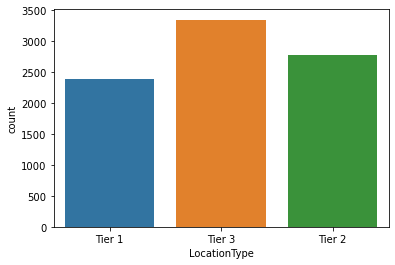

In [12]:
sns.countplot(df.LocationType)

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FatContent', ylabel='count'>

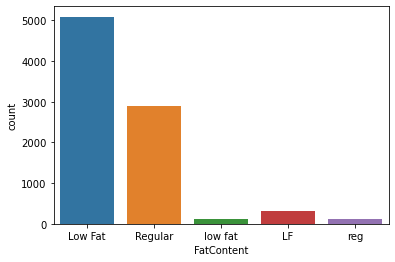

In [13]:
sns.countplot(df.FatContent)

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


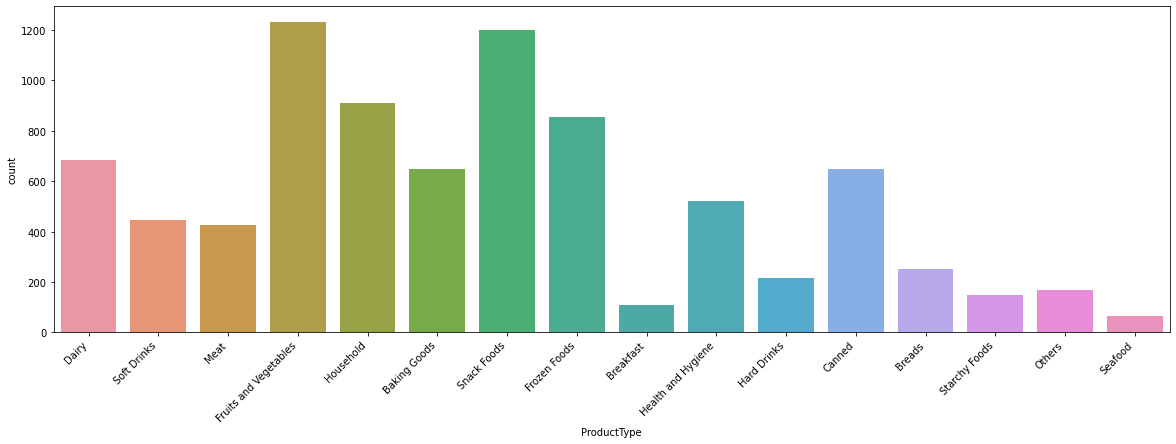

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(df.ProductType)
plt.xticks(rotation=45, ha='right')
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OutletID', ylabel='count'>

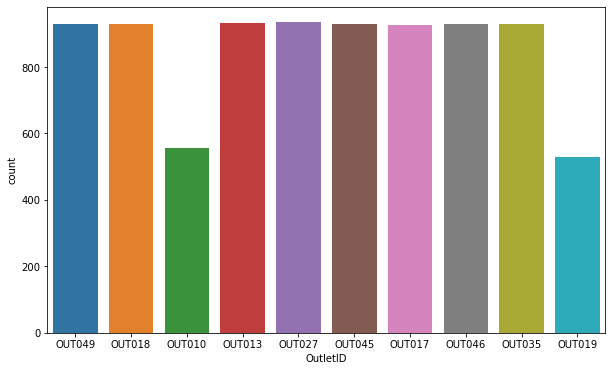

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(df.OutletID)

<AxesSubplot:ylabel='OutletSize'>

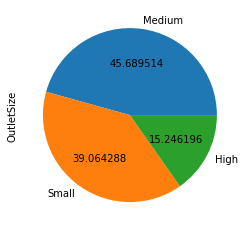

In [16]:
# sns.countplot(df.OutletSize)
df.OutletSize.value_counts().plot(kind='pie', autopct='%2f')

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='EstablishmentYear', ylabel='count'>

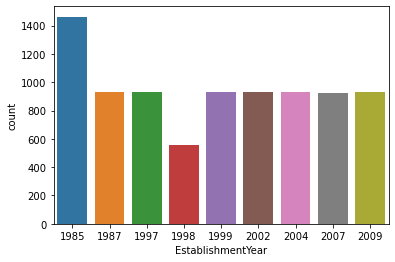

In [17]:
sns.countplot(df.EstablishmentYear)

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OutletType', ylabel='count'>

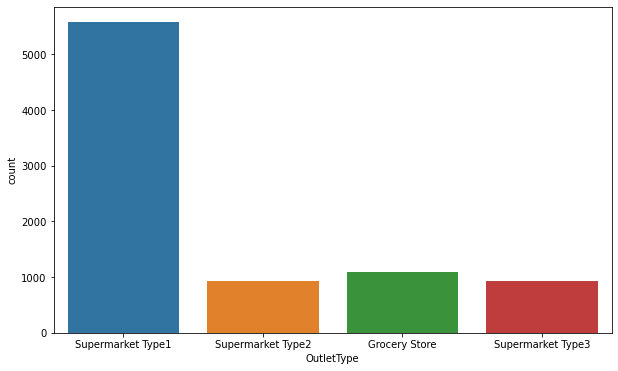

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df.OutletType)

Plotting Univariate Numerical Data

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


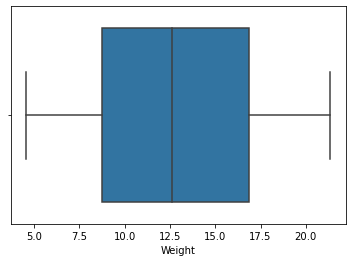

0.0824262091221237


In [19]:
# plt.hist(df.Weight, bins=55)
sns.boxplot(df.Weight)
plt.show()
print(df.Weight.skew())

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


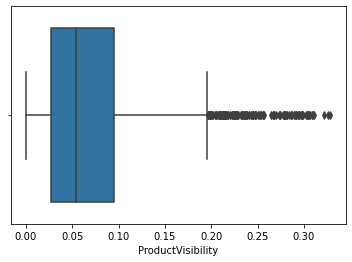

1.1670905496918407


In [20]:
# plt.hist(df.ProductVisibility, bins=25)
# sns.distplot(df.ProductVisibility)
sns.boxplot(df.ProductVisibility)
plt.show()
print(df.ProductVisibility.skew())

Plotting bi-variate/multivariate categorical & Numerical data 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


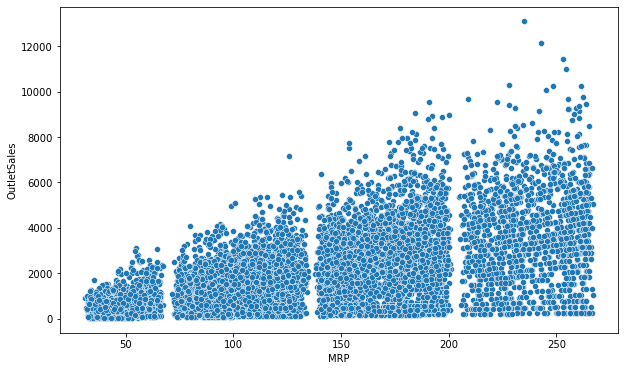

In [49]:
# Numerical - Numerical analysis
plt.figure(figsize=(10,6))
# sns.scatterplot(df.MRP, df.OutletSales, hue=df.FatContent, style=df.OutletSize, size=df.LocationType)
sns.scatterplot(df.MRP, df.OutletSales)
plt.show()
# linear relation of sales with MRP

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


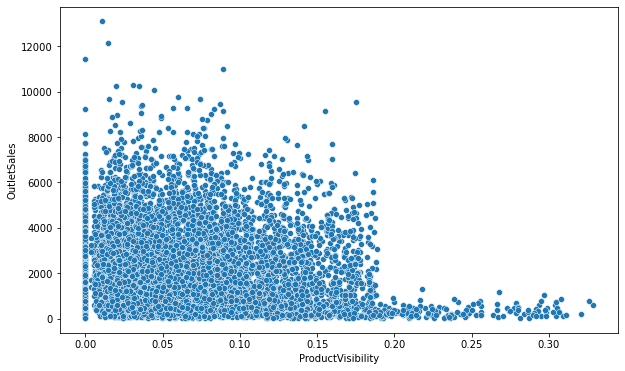

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.ProductVisibility, df.OutletSales)
plt.show()
# Sales of products higher when Product is lesser visible.

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


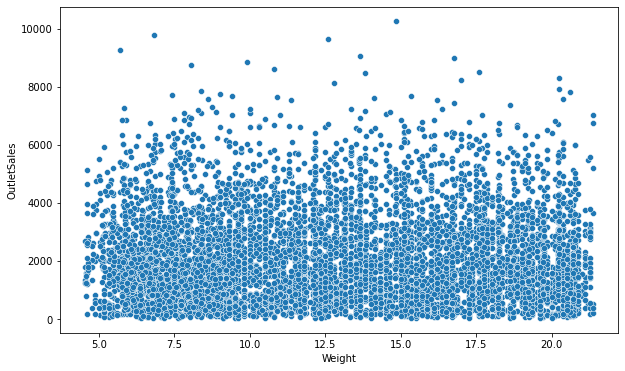

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.Weight, df.OutletSales)
plt.show()
# Sales does not have a strong relationship with Weight

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


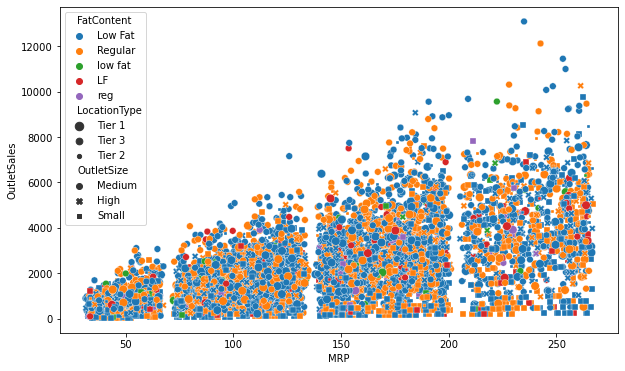

In [55]:
# Numerical - Numerical with other categorical content 
plt.figure(figsize=(10,6))
sns.scatterplot(df.MRP, df.OutletSales, hue=df.FatContent, style=df.OutletSize, size=df.LocationType)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


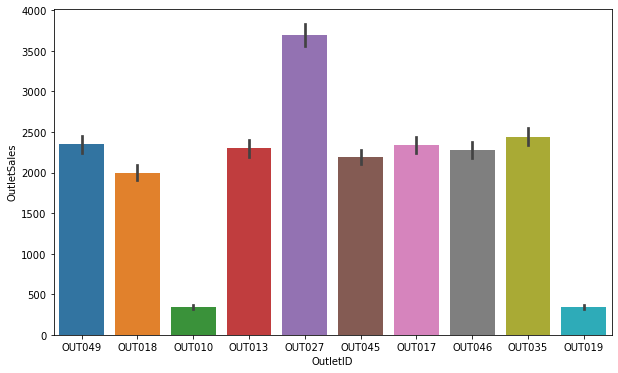

In [68]:
# Numerical - Categorical
plt.figure(figsize=(10,6))
sns.barplot(df.OutletID, df.OutletSales)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


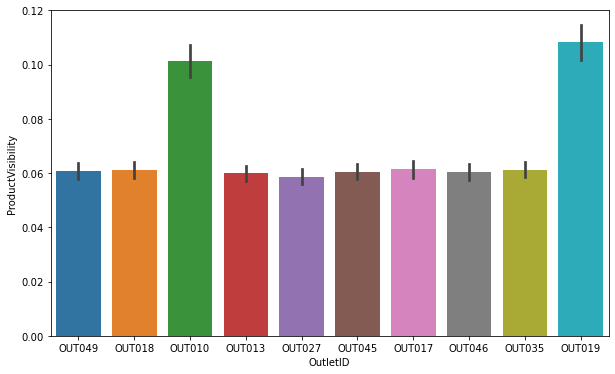

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(df.OutletID, df.ProductVisibility)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


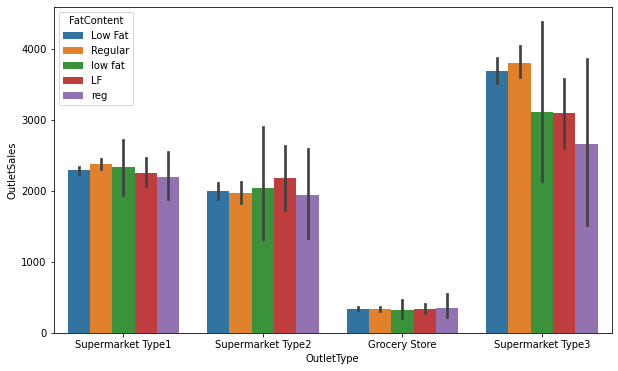

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(df.OutletType, df.OutletSales, hue=df.FatContent)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


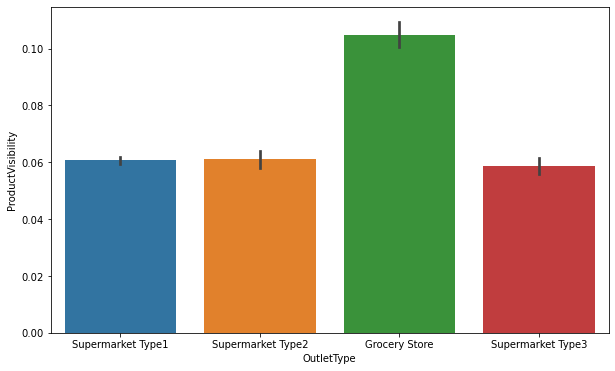

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(df.OutletType, df.ProductVisibility)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


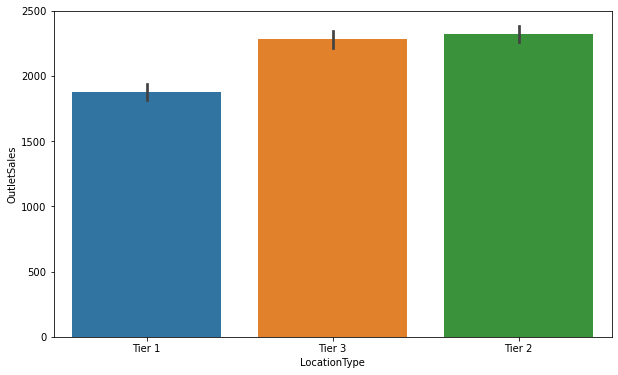

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(df.LocationType, df.OutletSales)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


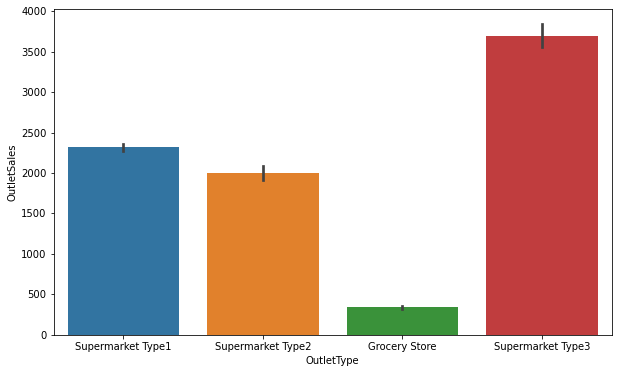

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(df.OutletType, df.OutletSales)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


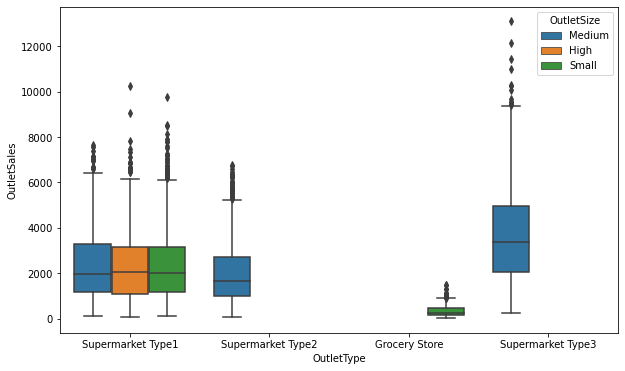

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(df.OutletType, df.OutletSales, hue=df.OutletSize)
plt.show()
# It will show the outliers on sales as well.

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

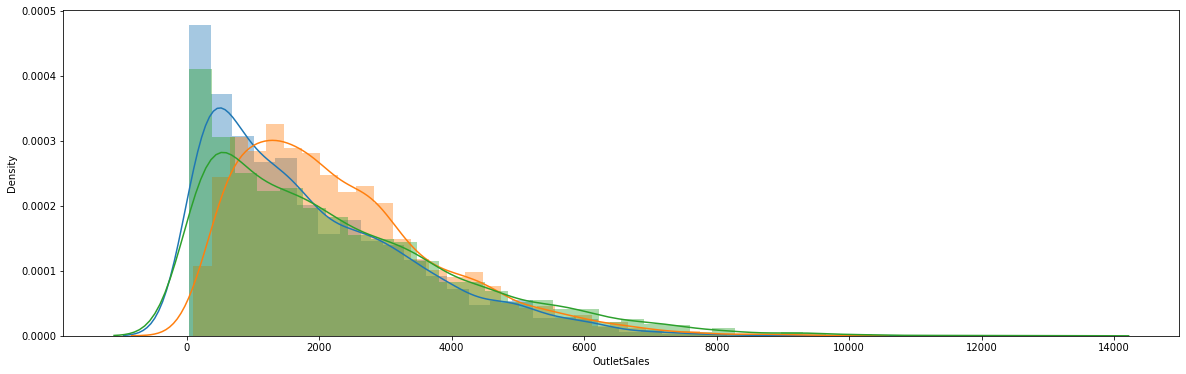

In [105]:
plt.figure(figsize=(20,6))
sns.distplot(df[df.LocationType == 'Tier 1'].OutletSales)
sns.distplot(df[df.LocationType == 'Tier 2'].OutletSales)
sns.distplot(df[df.LocationType == 'Tier 3'].OutletSales)
plt.show()